**Introduction**

---
Academic stress has become a pressing issue among students globally, with profound impacts on their mental health and academic outcomes. This analysis seeks to identify and measure the key factors contributing to academic stress, offering a basis for data-driven research, mental health evaluation, and the development of informed educational policies.

**Data Description**

---

**Data Source :** (Kaggle) https://www.kaggle.com/datasets/poushal02/student-academic-stress-real-world-dataset




**Analysis Strategy**

---

**1. Data Preparation**
  - Data Cleaning
  - Feature Engineering

**2. Descriptive Statistics & Exploration**
  - Summary Statistics: Mean, median, and distribution of all numerical variables (peer pressure, home pressure, academic competition, stress index).
  - Categorical Insights: Frequency counts for academic stage, coping strategies, study environment, bad habits.
  - Stress by Group: Compare mean stress index across:
    - Academic stages (high school vs undergraduate vs postgraduate).
    - Study environment (peaceful vs noisy/disrupted).
    - Coping strategies.

**3. Visualization**
  - Univariate: Histograms for numerical variables, bar plots for categorical variables.
  - Bivariate:
    - Boxplots: Stress index by academic stage / study environment / coping strategy.
    - Heatmap: Correlation matrix for numerical variables.

**4. Inferential Analysis**
  - Correlation Tests: Pearson/Spearman correlations between stress index and numerical predictors.

**5. Predictive Modeling**
  - Regression Analysis:
    - Multiple Linear Regression (predicting stress index from peer pressure, home pressure, academic competition, categorical predictors).
    - Cross-validation for model reliability.

**6. Interpretation & Reporting**
  - Identify the strongest predictors of stress.
  - Highlight which pressures (social, environmental, performance) matter most.
  - Compare across educational stages (who is most vulnerable and why).
  - Translate results into insights for educational policy and student support programs.

In [115]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm

## **1. Data Preparation**

In [116]:
# Load the Dataset
data_df = pd.read_csv("/content/academic Stress level - maintainance 1.csv")
data_df.head(2)

,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3


In [117]:
# Dataset Exploration

print(f"The dataset shape is {data_df.shape}, meaning there are {data_df.shape[0]} rows and {data_df.shape[1]} columns.\n\n")

print(f"The dataframe summary is : {data_df.info()}")

The dataset shape is (140, 9), meaning there are 140 rows and 9 columns.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Timestamp                                                            140 non-null    object
 1   Your Academic Stage                                                  140 non-null    object
 2   Peer pressure                                                        140 non-null    int64 
 3   Academic pressure from your home                                     140 non-null    int64 
 4   Study Environment                                                    139 non-null    object
 5   What coping strategy you use as a student?                           140 non-null    object
 6   Do you have any bad habits like smoking,

In [118]:
# Check for null values
data_df.isnull().sum()

,0
Timestamp,0
Your Academic Stage,0
Peer pressure,0
Academic pressure from your home,0
Study Environment,1
What coping strategy you use as a student?,0
"Do you have any bad habits like smoking, drinking on a daily basis?",0
What would you rate the academic competition in your student life,0
Rate your academic stress index,0


In [119]:
# Quick duplicates check on Timestamp as this is the only unique identifying factor for the students
if 'Timestamp' in data_df.columns:
    print(f"Timestamps that are unique are {data_df['Timestamp'].nunique()} of the total {len(data_df)} rows.")


Timestamps that are unique are 140 of the total 140 rows.


In [120]:
# Now that I have confirmed that the Timestamps are unique, I will create a "student_id" column that will be a much better identifying column
data_df = data_df.sort_values('Timestamp').reset_index(drop=True)

# Create a sequential number (starting at 1)
data_df['student_id'] = data_df.index + 1

# Format it as S001, S002, ... Sn
data_df['student_id'] = data_df['student_id'].apply(lambda x: f"S{x:03d}")

In [121]:
# Check the unique values in every column except for the "Timestamp" column

columns_to_check = data_df.columns.drop('Timestamp')

for col in columns_to_check:
    unique_values = data_df[col].unique()
    print(f"\n--- Unique Values for '{col}' ---")
    print(unique_values)


--- Unique Values for 'Your Academic Stage' ---
['post-graduate' 'undergraduate' 'high school']

--- Unique Values for 'Peer pressure' ---
[3 5 4 2 1]

--- Unique Values for 'Academic pressure from your home' ---
[4 1 3 5 2]

--- Unique Values for 'Study Environment' ---
['Peaceful' 'Noisy' 'disrupted' nan]

--- Unique Values for 'What coping strategy you use as a student?' ---
['Social support (friends, family)'
 'Analyze the situation and handle it with intellect'
 'Emotional breakdown (crying a lot)']

--- Unique Values for 'Do you have any bad habits like smoking, drinking on a daily basis?' ---
['No' 'Yes' 'prefer not to say']

--- Unique Values for 'What would you rate the academic  competition in your student life' ---
[1 5 3 2 4]

--- Unique Values for 'Rate your academic stress index ' ---
[4 5 3 2 1]

--- Unique Values for 'student_id' ---
['S001' 'S002' 'S003' 'S004' 'S005' 'S006' 'S007' 'S008' 'S009' 'S010'
 'S011' 'S012' 'S013' 'S014' 'S015' 'S016' 'S017' 'S018' 'S019' 'S

In [122]:
# Check the new dataframe

data_df.head()

,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index,student_id
0,11/08/2025 12:15:00,post-graduate,3,4,Peaceful,"Social support (friends, family)",No,1,4,S001
1,11/08/2025 18:07:26,undergraduate,5,1,Noisy,Analyze the situation and handle it with intel...,Yes,5,5,S002
2,11/08/2025 19:29:07,post-graduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,3,3,S003
3,12/08/2025 02:28:42,post-graduate,3,4,Peaceful,"Social support (friends, family)",No,2,4,S004
4,12/08/2025 08:11:48,post-graduate,3,1,disrupted,"Social support (friends, family)",No,4,5,S005


In [123]:
# Rename the columns to make it more manageable to work with

data_df.rename(columns={
    "Timestamp": "timestamp",
    "Your Academic Stage": "academic_stage",
    "Peer pressure": "peer_pressure_level",
    "Academic pressure from your home": "home_pressure_level",
    "Study Environment": "study_environment",
    "What coping strategy you use as a student?": "coping_strategy",
    "Do you have any bad habits like smoking, drinking on a daily basis?": "bad_habits_present",
    "What would you rate the academic  competition in your student life": "academic_competition_rating",
    "Rate your academic stress index ": "stress_index"
}, inplace=True)


print(f"The new columns are : {data_df.columns}")


The new columns are : Index(['timestamp', 'academic_stage', 'peer_pressure_level',
       'home_pressure_level', 'study_environment', 'coping_strategy',
       'bad_habits_present', 'academic_competition_rating', 'stress_index',
       'student_id'],
      dtype='object')


In [124]:
# Convert Timestamp to datetime
data_df['timestamp'] = pd.to_datetime(data_df['timestamp'], format='%d/%m/%Y %H:%M:%S')

In [125]:
# Clean categorical labels
data_df['study_environment'] = data_df['study_environment'].str.strip().str.capitalize()

In [126]:
# Handle missing values in the column "study_environment"
data_df['study_environment'] = data_df.groupby('academic_stage')['study_environment']\
                                      .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

In [127]:
#  Confirm that there are no null values in the columns

data_df.isnull().sum()

,0
timestamp,0
academic_stage,0
peer_pressure_level,0
home_pressure_level,0
study_environment,0
coping_strategy,0
bad_habits_present,0
academic_competition_rating,0
stress_index,0
student_id,0


## 2. Descriptive Statistics & Exploration

In [128]:
# Summary stats for numerical columns
print("Summary Statistics for Numerical Columns:")
data_df[['peer_pressure_level', 'home_pressure_level', 'academic_competition_rating', 'stress_index']].describe()

Summary Statistics for Numerical Columns:


,peer_pressure_level,home_pressure_level,academic_competition_rating,stress_index
count,140.000000,140.000000,140.000000,140.000000
mean,3.071429,3.178571,3.492857,3.721429
std,1.083844,1.276618,1.028349,1.032339
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,3.000000
50%,3.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [129]:
# Frequency counts for categorical columns
print("\033[1m\nFrequency Counts for Categorical Columns:\033[0m")
for col in ['academic_stage', 'study_environment', 'coping_strategy', 'bad_habits_present']:
    print(f"\033[1m\n{col}:\033[0m\n", data_df[col].value_counts())


Frequency Counts for Categorical Columns:

academic_stage:
 academic_stage
undergraduate    100
high school       29
post-graduate     11
Name: count, dtype: int64

study_environment:
 study_environment
Peaceful     70
Disrupted    38
Noisy        32
Name: count, dtype: int64

coping_strategy:
 coping_strategy
Analyze the situation and handle it with intellect    87
Emotional breakdown (crying a lot)                    32
Social support (friends, family)                      21
Name: count, dtype: int64

bad_habits_present:
 bad_habits_present
No                   123
Yes                   10
prefer not to say      7
Name: count, dtype: int64


## 3. Visualization

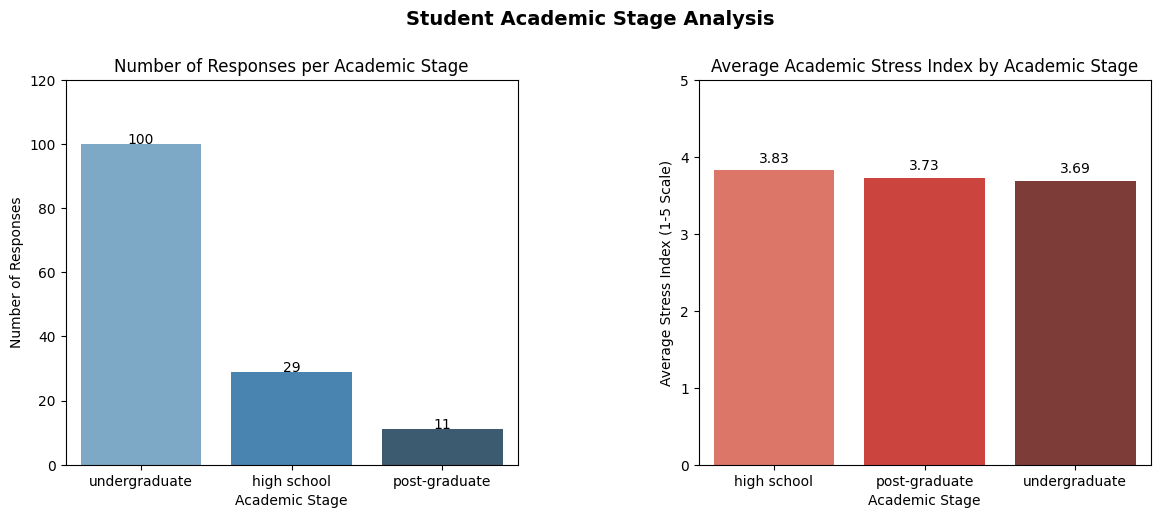

In [130]:
# Aggregate the Data

# Calculate the count of responses per academic stage
response_counts = data_df['academic_stage'].value_counts().reset_index()
response_counts.columns = ['academic_stage', 'Response Count']

# Calculate the average stress index per academic stage
average_stress = data_df.groupby('academic_stage')['stress_index'].mean().reset_index()
average_stress.columns = ['academic_stage', 'stress_index']


# Create the Two Subplots ---

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plt.subplots_adjust(wspace=0.4) # Add space between subplots
plt.suptitle('Student Academic Stage Analysis', fontsize=14, fontweight='bold', y=1.02)


# --- Chart 1: Number of Responses per Academic Level ---
ax1 = axes[0]
sns.barplot(
    x='academic_stage',
    y='Response Count',
    data=response_counts,
    palette='Blues_d',
    hue='academic_stage',
    legend=False,
    ax=ax1
)
ax1.set_title('Number of Responses per Academic Stage', fontsize=12)
ax1.set_xlabel('Academic Stage', fontsize=10)
ax1.set_ylabel('Number of Responses', fontsize=10)
ax1.set_ylim(0, response_counts['Response Count'].max() * 1.2)

# Add value labels
for index, row in response_counts.iterrows():
    ax1.text(
        index,
        row['Response Count'] + 0.1,
        str(row['Response Count']),
        color='black',
        ha='center',
        fontsize=10
    )


# --- Chart 2: Average Stress Index per Academic Level ---
ax2 = axes[1]
# Sort by stress level for clearer visualization
average_stress_sorted = average_stress.sort_values(by='stress_index', ascending=False)
sns.barplot(
    x='academic_stage',
    y='stress_index',
    data=average_stress_sorted,
    palette='Reds_d',
    hue='academic_stage',
    legend=False,
    ax=ax2
)
ax2.set_title('Average Academic Stress Index by Academic Stage', fontsize=12)
ax2.set_xlabel('Academic Stage', fontsize=10)
ax2.set_ylabel('Average Stress Index (1-5 Scale)', fontsize=10)
ax2.set_ylim(0, 5)

# Add value labels
for index, row in average_stress_sorted.reset_index(drop=True).iterrows():
    ax2.text(
        index,
        row['stress_index'] + 0.1,
        f"{row['stress_index']:.2f}",
        color='black',
        ha='center',
        fontsize=10
    )

plt.show()

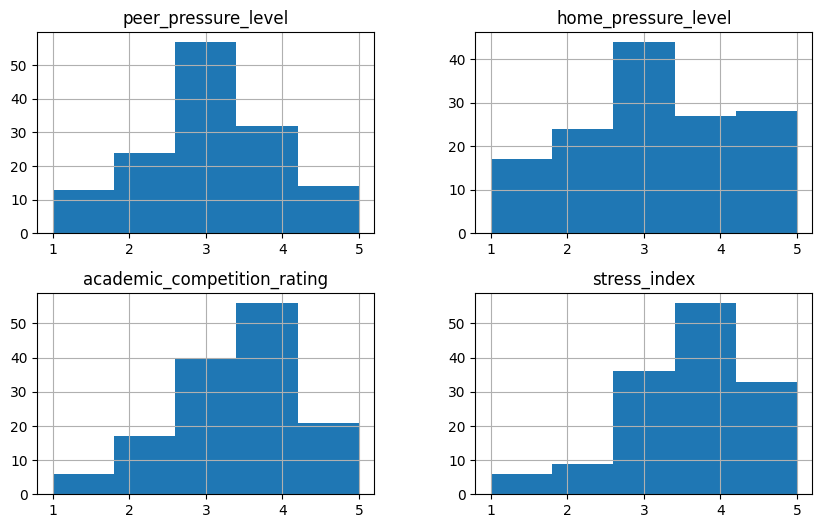

In [131]:
# Histograms for numerical features
data_df[['peer_pressure_level','home_pressure_level','academic_competition_rating','stress_index']].hist(bins=5, figsize=(10,6))
plt.show()

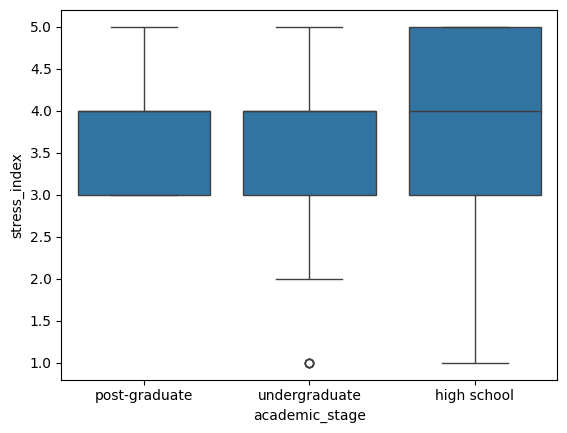

In [132]:
# Boxplot: Stress index by Academic Stage
sns.boxplot(x='academic_stage', y='stress_index', data=data_df)
plt.show()

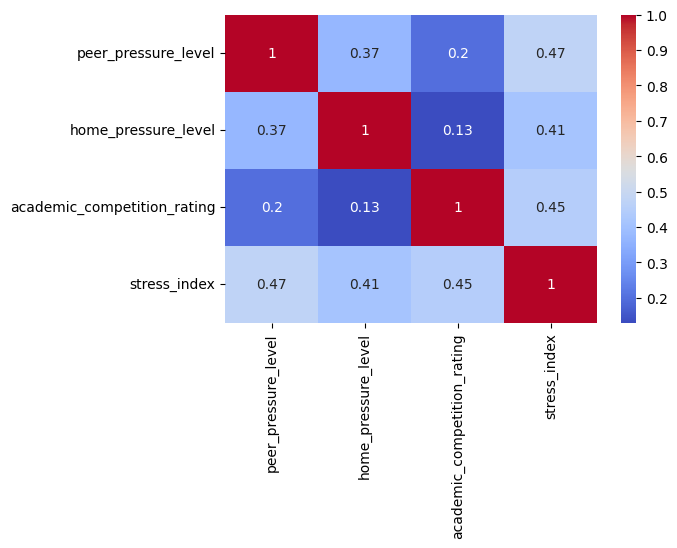

In [133]:
# Heatmap of numerical correlations
plt.figure(figsize=(6,4))
sns.heatmap(data_df[['peer_pressure_level','home_pressure_level', 'academic_competition_rating',
                     'stress_index']].corr(), annot=True, cmap='coolwarm')
plt.show()

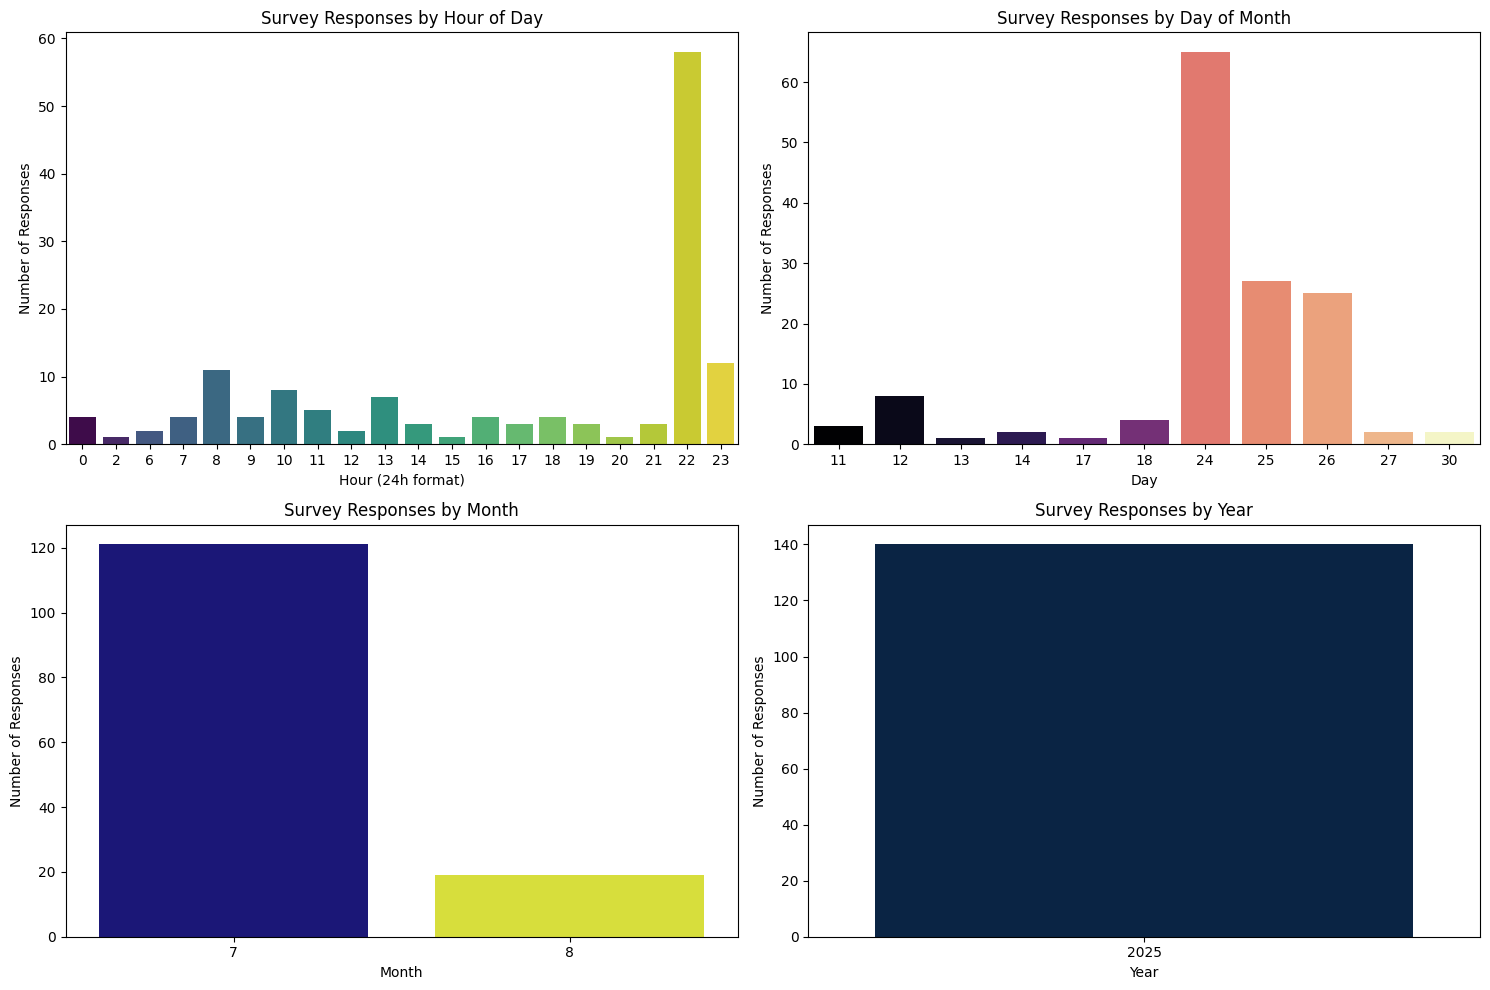

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract time features
data_df['hour'] = data_df['timestamp'].dt.hour
data_df['day'] = data_df['timestamp'].dt.day
data_df['month'] = data_df['timestamp'].dt.month
data_df['year'] = data_df['timestamp'].dt.year

plt.figure(figsize=(15,10))

# 1. Hour of the day
plt.subplot(2,2,1)
sns.countplot(x='hour', data=data_df, hue='hour', palette='viridis',  legend=False)
plt.title("Survey Responses by Hour of Day")
plt.xlabel("Hour (24h format)")
plt.ylabel("Number of Responses")

# 2. Day of the month
plt.subplot(2,2,2)
sns.countplot(x='day', data=data_df,  hue='day', palette='magma', legend=False)
plt.title("Survey Responses by Day of Month")
plt.xlabel("Day")
plt.ylabel("Number of Responses")

# 3. Month of the year
plt.subplot(2,2,3)
sns.countplot(x='month', data=data_df, hue='month', palette='plasma', legend=False)
plt.title("Survey Responses by Month")
plt.xlabel("Month")
plt.ylabel("Number of Responses")

# 4. Year
plt.subplot(2,2,4)
sns.countplot(x='year', data=data_df, hue='year', palette='cividis', legend=False)
plt.title("Survey Responses by Year")
plt.xlabel("Year")
plt.ylabel("Number of Responses")

plt.tight_layout()
plt.show()

## 4. Inferential Analysis

In [135]:
from scipy.stats import pearsonr

corr, pval = pearsonr(data_df['peer_pressure_level'],  data_df['stress_index'])
print(f"Peer Pressure vs Stress Index: correlation={corr:.2f}, p={pval:.4f}")

Peer Pressure vs Stress Index: correlation=0.47, p=0.0000


## 5. Predictive Modeling

In [136]:
# Encode categoricals
df_encoded = data_df.copy()
le = LabelEncoder()
for col in ['academic_stage','study_environment','coping_strategy','bad_habits_present']:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Define predictors and target
X = df_encoded[['peer_pressure_level','home_pressure_level','academic_competition_rating',
                'academic_stage','study_environment','coping_strategy','bad_habits_present']]
y = df_encoded['stress_index']

# Add constant for statsmodels regression
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           stress_index   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     14.49
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           6.79e-14
Time:                        11:42:04   Log-Likelihood:                -162.70
No. Observations:                 140   AIC:                             341.4
Df Residuals:                     132   BIC:                             364.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

academic_competition_rating    0.377641
peer_pressure_level            0.217297
home_pressure_level            0.161867
coping_strategy                0.074848
study_environment              0.070395
academic_stage                 0.060514
bad_habits_present             0.037438
dtype: float64


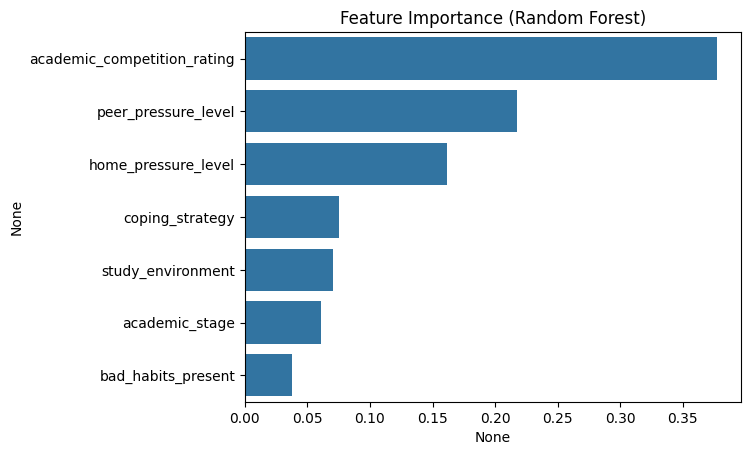

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Feature importance
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feat_imp)

sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance (Random Forest)")
plt.show()

## 6. Interpretation & Reporting (Findings)

**Findings**

---
Using 140 survey responses, I examined how social, environmental and performance pressures predict students’ self-reported academic stress (1–5 scale). Bivariate analysis showed a moderate positive correlation between peer pressure and stress (Pearson 𝑟 ≈ 0.47, p < 0.001). The random-forest model paints a clearer picture: **performance pressure (academic competition), peer pressure, ** and ** home/family pressure** are the most consistent and strongest predictors of higher academic stress. Random-forest feature importances ranked predictors in the same order: competition > peer pressure > home pressure. Environmental factors (study environment), coping strategy, and self-reported bad habits were weaker predictors after adjustment.


**Answer to the research question:**

---
The interplay of social (peer, home) and performance (competition) pressures meaningfully predicts a student’s academic stress index. Competition appears to be the single most potent stress accelerant, followed by peer and home pressure. Importantly, the effect of peer pressure is moderated by academic stage: it has the largest impact on stress among high-school students and declines for post-graduate and undergraduate stages (interaction p = 0.016). In short: performance pressure is globally important, and social pressure is especially acute for high-school students.


**Conclusion & practical implications:**

---
Interventions designed to reduce academic stress should prioritize addressing competitive pressure (for example, policies that reduce high-stakes comparative evaluation and promote growth-oriented assessment). At the same time, programs that reduce harmful peer influences or provide peer-support training would likely yield the greatest benefit in high-school populations, where peer pressure drives stress most strongly. Because the model explains ~44% of stress variance, a substantial portion of stress remains unexplained — indicating that additional individual, contextual, and psychological factors (not measured here) also matter.
Therefore, future work should include:
- larger, longitudinal samples to examine causality,
- probe the roles of coping strategies more deeply (qualitatively and quantitatively), and
- test targeted interventions in the educational stages identified as vulnerable.